In [33]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import linalg as la
from scipy.optimize import curve_fit

# Gradient Descent in 2 Dimensions

## Derivatives and Direction
Given a function $y=f(x)$ the derivative $f^\prime(x)$ tells us the slope of the tagent line.  For example if $$f(x)=3 x^4 + 4 x^3 - 39 x^22+1$$ then $$f^\prime(x)=12x^3 + 12x^2 - 72 x.$$  When we fined $f^\prime(1)=-48$ we know that taking a step forward along the graph of the function, say $\Delta x=1$, we go down by about $\Delta y=-48$. Likewise, since $f^\prime(-1)=72$ we know that when we take a step forward along the graph of the function, again $\Delta x=1$, we will go up by about $\Delta y=72$.

In [34]:
# Function f(x)
def f(x):
    return 3*x**4 + 4*x**3 - 39*x**2+1
    
# Derivative of f(x)
def df(x):
    return 12*x**3 + 12*x**2 - 72*x

# Tangent line to f(x) at x=a
def ttf(x,a):
    return df(a)*(x-a)+f(a)

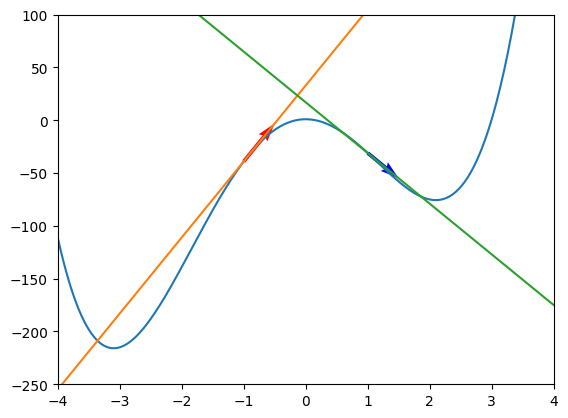

In [35]:
# Here is a plot of the function f(x) along with some tangent lines.

x = np.linspace(-5,5,500)

# Plot of f(x)
plt.plot(x,f(x))
plt.xlim(-4,4)
plt.ylim(-250,100)

# Plot of the tangent to f(x) at x=-1 and corresponding direction vector
plt.plot(x,ttf(x,-1))
plt.quiver(-1,f(-1),1,df(-1),angles='xy',scale_units='xy',scale=2,color='red')

# Plot of the tangent to f(x) at x=1 and corresponding direction vector
plt.plot(x,ttf(x,1))
plt.quiver(1,f(1),1,df(1),angles='xy',scale_units='xy',scale=2,color='blue')

## Finding Minimums
We can use this basic idea to find minimums of a function when it is not possible or practical to solve for the critical values.  

If the derivative, slope, is positive then moving forwatd is going up, so if we want to find the minimum value we need to go backwards.  However, if the slope is negative then the minimum is ahead of you, and you want to go forwards. So, the direction we move is always opposite in sign to the derivative:
- A ***positive*** derivative means the function is increasing and we need a ***negaive*** change in $x$ to find the minimum.
- A ***negative*** derivative means the function is decreasing and we need a ***positive*** change in $x$ to fine the minimum.

A basic Algorithm for finding the minimum might look something like:

Given a function $f(x)$ and its derivative $f^\prime(x)$:
1. Pick an initial x value $x_0$
2. Let the initial y value be $y_0=f(x_0)$
3. Pick a step size call it $dx$
4. Start a loop that stops after a fixed number of steps or when the output values stop changing significantly
    1. In the loop let $x_i = x_{i-1} - dx\cdot f^{\prime}(x_{i-1})$
    2. Then let $y_i=f(x_i)$
    3. If $x_i=x_{i-1}$, the derivative was zero and we need to adjust or $x_i$ a bit, say by $dx$ and try again.
    4. If $y_i\geq y_{i-1}$ we probably went to far, so decrease the step size and iterate again.
    5. If $y_i<y_{i-1}$ we are going in the right direction, maybe risk taking larger steps.

This is a very basic version of the ***Gradient Descent*** algorithm.

In [36]:
# Initial Values
dx = 10**(-2)
xVals = [0]
yVals = [f(xVals[-1])]
i=0

# The most recent x value.
temp_x = xVals[-1]

# Loop
for i in range(500):
# Most recent y
    temp_y = f(temp_x)
# New x and y
    new_x = temp_x-dx*df(temp_x)
    new_y = f(new_x)
# Iteration step
    if new_x==temp_x: 
        temp_x += dx
    elif new_y<temp_y:
        temp_x = new_x
        dx = 1.01*dx
        xVals.append(new_x)
        yVals.append(new_y)
    else:
        dx = 0.9*dx

## Visualizing the Results
Below we can see the results of ploting the $x$ and $y$ coordinates we found at each step.  If you go back and try changing the initial values in the above loop you will see that if/or how fast we find the minimum varies greatly.  They also effect which minimum we find.

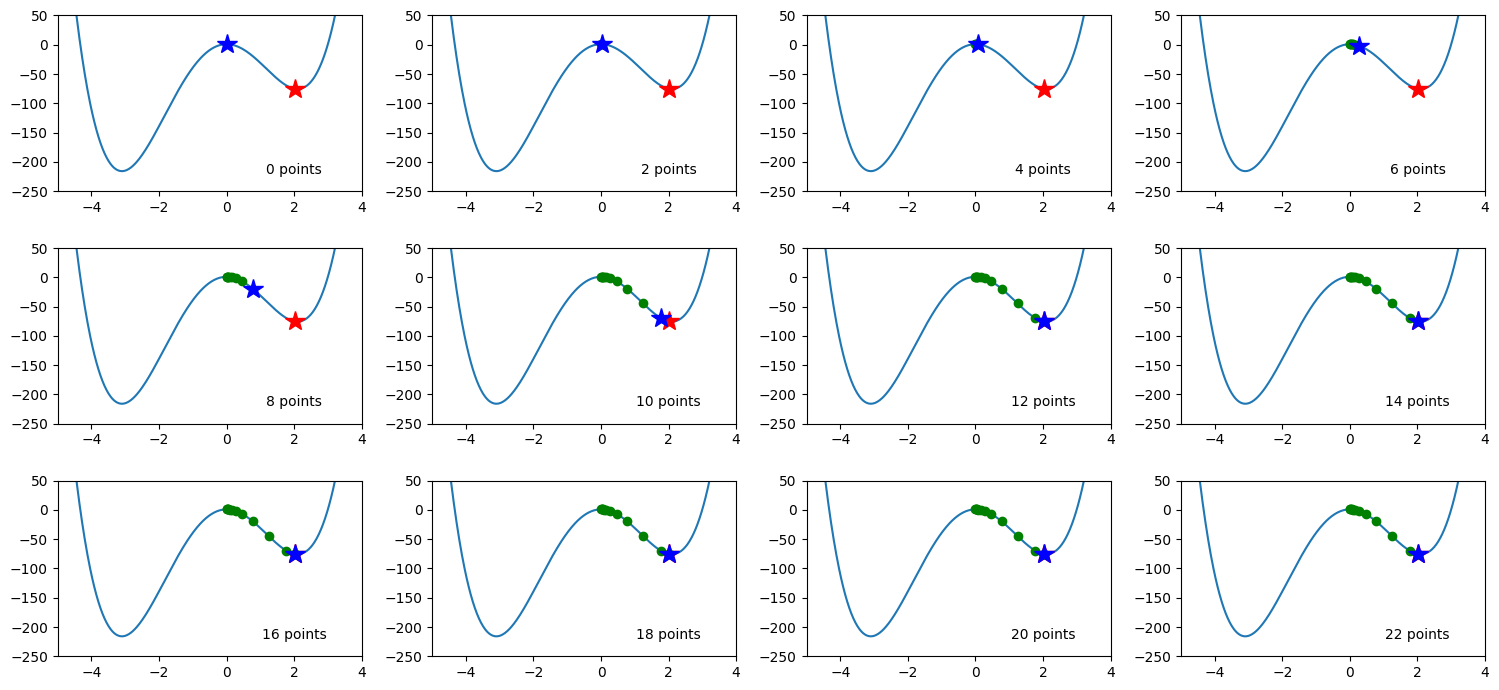

In [37]:

# Set parameters for the graphing windows
x_min = -5
x_max = 4
y_min = -250
y_max = 50
x_annotate = x_max-2
y_annotate = y_min+30

# Parameters for the loop to create the graphs
final = len(xVals)-1
step = max(1,final/6)
index = 0
current = 0

# Create plot object with 12 smaller plots
GD_fig, GD_ax = plt.subplots(ncols=4, nrows=3,figsize=(15,7))
GD_fig.tight_layout(h_pad=2, w_pad=2)

# Fill the plots
for row in range(3):
    for col in range(4):
        GD_ax[row,col].plot(x,f(x))
        GD_ax[row,col].plot(xVals[final],yVals[final],"r*",markersize=15)
        GD_ax[row,col].plot(xVals[:index],yVals[:index],"go")
        GD_ax[row,col].plot(xVals[current],yVals[current],"b*",markersize=15)
        GD_ax[row,col].set_xlim(x_min,x_max)
        GD_ax[row,col].set_ylim(y_min,y_max)
        GD_ax[row,col].annotate(str(index)+" points",(x_annotate,y_annotate),horizontalalignment='center')
        index = int(index+step)
        current = min(index,final)


...

# Fitting Data with Gradient Descent
Our goal in fitting a curve, $y=f(x)$, to a set of data is to minimize a sum such as $$C=\frac{1}{n}\sum_{i=1}^n (f(x_i)-y_i)^2,$$ i.e. we are minimizing the sum of the squares or the mean sum of squares in this case.  We will use gradient desecent to minimize $C$; this requires extensive use of the chain rule.

## Entering Data and Using SciPy

We start by using Pandas to read in the data we want to analize and look at how to use SciPy to fit curves to the data.

In [38]:
# Here we import the data and assign each column of values to a variable:
# Notice that as columsn are assigned they are made Numpy arrays
df = pd.read_csv('../data/alcohol_calories.csv')
t = np.array(df['Alcohol'])
oz = np.array(df['oz'])
cal = np.array(df['calories'])

# This calculation creates a Numpy array of calories per oz
cal_per_ounce = cal/oz

# This sorts the data and assigns it to the variables x and y
indicies = np.argsort(oz)
X = oz[indicies]
Y = cal_per_ounce[indicies]

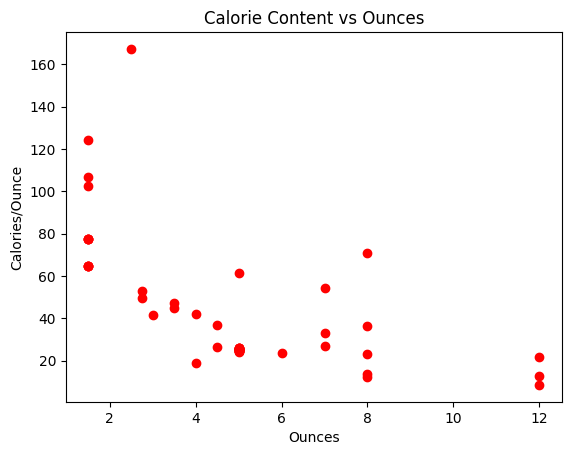

In [39]:
fig,ax = plt.subplots();
scatt_plot = ax.plot(X,Y,"ro");
ax.set_title("Calorie Content vs Ounces");
ax.set_xlabel('Ounces');
ax.set_ylabel('Calories/Ounce');

In [ ]:
# These create function representing arbitray linear, quadratic, and exponential functions
def arb_linear(x,a,b): return a*x+b
def arb_quad(x,a,b,c): return a*(x-b)**2+c
def arb_exp(x,a,b,c): return c+b*np.exp(a*x)

In [41]:
lcoef,lcovar = curve_fit(arb_linear, X, Y)
qcoef,qcovar = curve_fit(arb_quad, X, Y)
ecoef,ecovar = curve_fit(arb_exp, X, Y,[-1,1,0]) # The [-1,1,0] gives SciPy our initial guess at the values of the parameters.

C:\Users\roccac.W-WCSU-LOCAL\AppData\Local\Temp\ipykernel_22892\3489062936.py:4: RuntimeWarning: overflow encountered in exp
  def arb_exp(x,a,b,c): return c+b*np.exp(a*x)


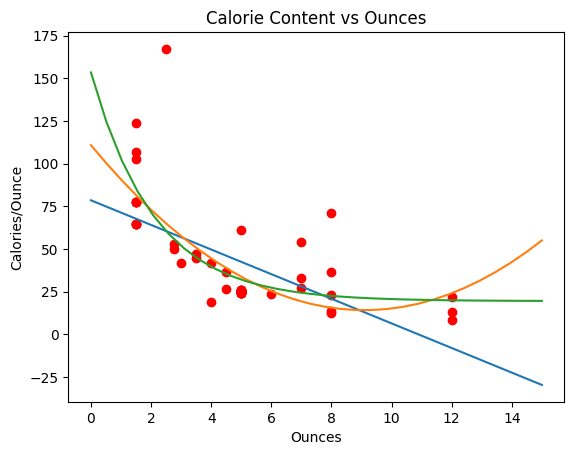

In [42]:
x=np.linspace(0,15,30)
line_approx = ax.plot(x,lcoef[0]*x+lcoef[1]);
quad_approx = ax.plot(x,arb_quad(x,qcoef[0],qcoef[1],qcoef[2]))
exp_approx = ax.plot(x,arb_exp(x,ecoef[0],ecoef[1],ecoef[2]))
fig

## Fitting a Linear Function

Suppose that we want to find parameters $a$ and $b$ for the expression $f(x)=ax+b$ so that we minimize the function:
$$C=\frac{1}{n} \sum (f(X)-Y)^2$$
for data sets $X$ and $Y$.  We can do this using gradient descent with the derivatives of $C$ with respect to each parameter:
$$
\begin{align}
    \frac{dC}{da} &= \frac{1}{n} \sum 2(aX+b-Y)(X)\\
    \frac{dC}{db} &= \frac{1}{n} \sum 2(aX+b-Y)(1)
\end{align}
$$

In [43]:
# Function to find the average square deviation
def C(x,y,a,b):
    yp = arb_linear(x,a,b)
    dy = yp-y
    return np.mean(dy**2)

# Derivative of the average deviation with respect to a, dC/da
def Ca(x,y,a,b):
    # Predicted y values
    yp = arb_linear(x,a,b)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*(x))

# Derivative of the average deviation with respect to b, dC/db
def Cb(x,y,a,b):
    # Predicted y values
    yp = arb_linear(x,a,b)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*1)

In [44]:
# Set reasonable starting values
a = [(Y[0]-Y[-1])/(X[0]-X[-1])]
b = [Y[0]]

# Set initial learning rate
dt = 0.01
for i in range(300):
    new_a = a[-1]-dt*Ca(X,Y,a[-1],b[-1])
    new_b = b[-1]-dt*Cb(X,Y,a[-1],b[-1])
    current_C = C(X,Y,a[-1],b[-1])
    updated_C = C(X,Y,new_a,new_b)
    if updated_C < current_C:
        a.append(new_a)
        b.append(new_b)
        dt = 1.01*dt
    else:
        dt = 0.9*dt

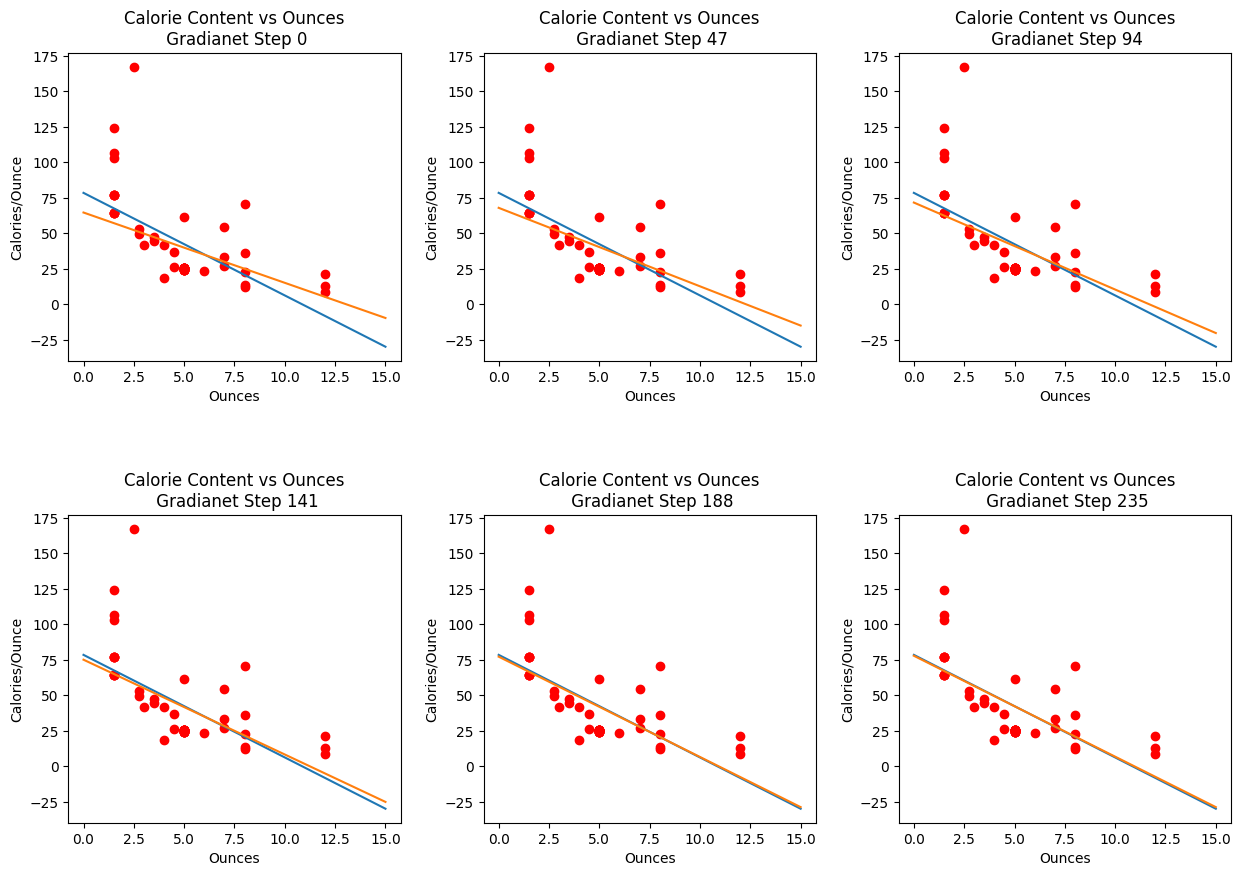

In [45]:
n = 0
step_size = len(a)//6

fig2,ax2 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig2.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax2[row,col].plot(oz,cal_per_ounce,"ro");
        ax2[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax2[row,col].set_xlabel('Ounces');
        ax2[row,col].set_ylabel('Calories/Ounce');
        ax2[row,col].plot(x,lcoef[0]*x+lcoef[1]);
        ax2[row,col].plot(x,a[n]*x+b[n]);
        n += step_size

We can see that after 235 steps using gradient descent there is little to no difference between our values and the values obtained using SciPy.

## Fitting a Quadratic Function

Suppose that we want to find parameters $a$, $b$ and $c$ for the expression $f(x)=a(x-b)^2+c$ so that we minimize the function:
$$C=\frac{1}{n} \sum (f(X)-Y)^2$$
for data sets $X$ and $Y$.  We can do this using gradient descent with the derivatives of $C$ with respect to each parameter.  To simplify this process we first split $f(x)$ into three layers 
1. $z_0=x-b$,
2. $z_1=a\, z_0^2$, and
3. $z_2=z_1+c$,

so that $$C=\frac{1}{n} \sum (z_2-Y)^2.$$

Then using the ***chain rule*** 
$$
\begin{align}
    \frac{dC}{dc}&=\frac{dC}{dz_2}\frac{dz_2}{dc}\\
    \frac{dC}{da}&=\frac{dC}{dz_2}\frac{dz_2}{da}=\frac{dC}{dz_2}\frac{dz_2}{dz_1}\frac{dz_1}{da}\\
    \frac{dC}{db}&=\frac{dC}{dz_2}\frac{dz_2}{db}=\frac{dC}{dz_2}\frac{dz_2}{dz_1}\frac{dz_1}{db}=\frac{dC}{dz_2}\frac{dz_2}{dz_1}\frac{dz_1}{dz_0}\frac{dz_0}{db}
\end{align}
$$

We can use these to build functions that allow us to apply gradient descent.


In [46]:
# Note on layers:
# z0 = X-b
# z1 = a*z0^2
# z2 = z1+c

# The cost function C
# C = mean of (z2-Y)^2
def C(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    return np.mean(dy**2)

# Return dC/dc = (dC/dz2)(dz2/dc) = (2(z2-Y))(1)
def Cc(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*(1))

# Return dC/da = (dC/dz2)(dz2/da) = (dC/dz2)(dz2/dz1)(dz1/da) = (2(z2-Y))(1)(z0^2)
def Ca(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    z0 = x-b
    return np.mean(2*dy*(1)*(z0**2))

# Return 
# dC/db = (dC/dz2)(dz2/db) = (dC/dz2)(dz2/dz1)(dz1/db) = (dC/dz2)(dz2/dz1)(dz1/dz0)(dz0/db) = (2(z2-Y))(1)(2*a*z0)(-1)
def Cb(x,y,a,b,c):
    # Predicted y values
    yp = arb_quad(x,a,b,c)
    # Error in the y values
    dy = yp-y
    z0 = x-b
    return np.mean(2*dy*(1)*(2*a*z0*-1))



In [47]:
# Pick the initial a, b, and c coefficients so that they
# give a parabola roughly fitting the data.
# (b,c) are chosen to but the vertex at the mean x and y values
# a is chosen so that the parabola goes through the first point (x,y)
b = [np.mean(X)]
c = [np.min(Y)]
a = [(Y[0]-c[-1])/(X[0]-b[-1])**2]

dt = 10**(-2)

for i in range(20000):
# Calculate the change
    da_temp = dt*Ca(X,Y,a[-1],b[-1],c[-1])
    db_temp = dt*Cb(X,Y,a[-1],b[-1],c[-1])
    dc_temp = dt*Cc(X,Y,a[-1],b[-1],c[-1])
# Calculate the new parameters
    temp_a = a[-1]-da_temp
    temp_b = b[-1]-db_temp
    temp_c = c[-1]-dc_temp
# Check for improvement
    current_C = C(X,Y,a[-1],b[-1],c[-1])
    next_C = C(X,Y,temp_a,temp_b,temp_c)
    if next_C < current_C:
        a.append(temp_a)
        b.append(temp_b)
        c.append(temp_c)
        dt = dt*1.01
    else:
        dt = dt*0.9
print(len(a),"\t:",a[-1],b[-1],c[-1])
print(qcoef)

18254 	: 1.1701147796792253 9.090970858932037 14.097109382329316
[ 1.17012957  9.09068304 14.1006923 ]


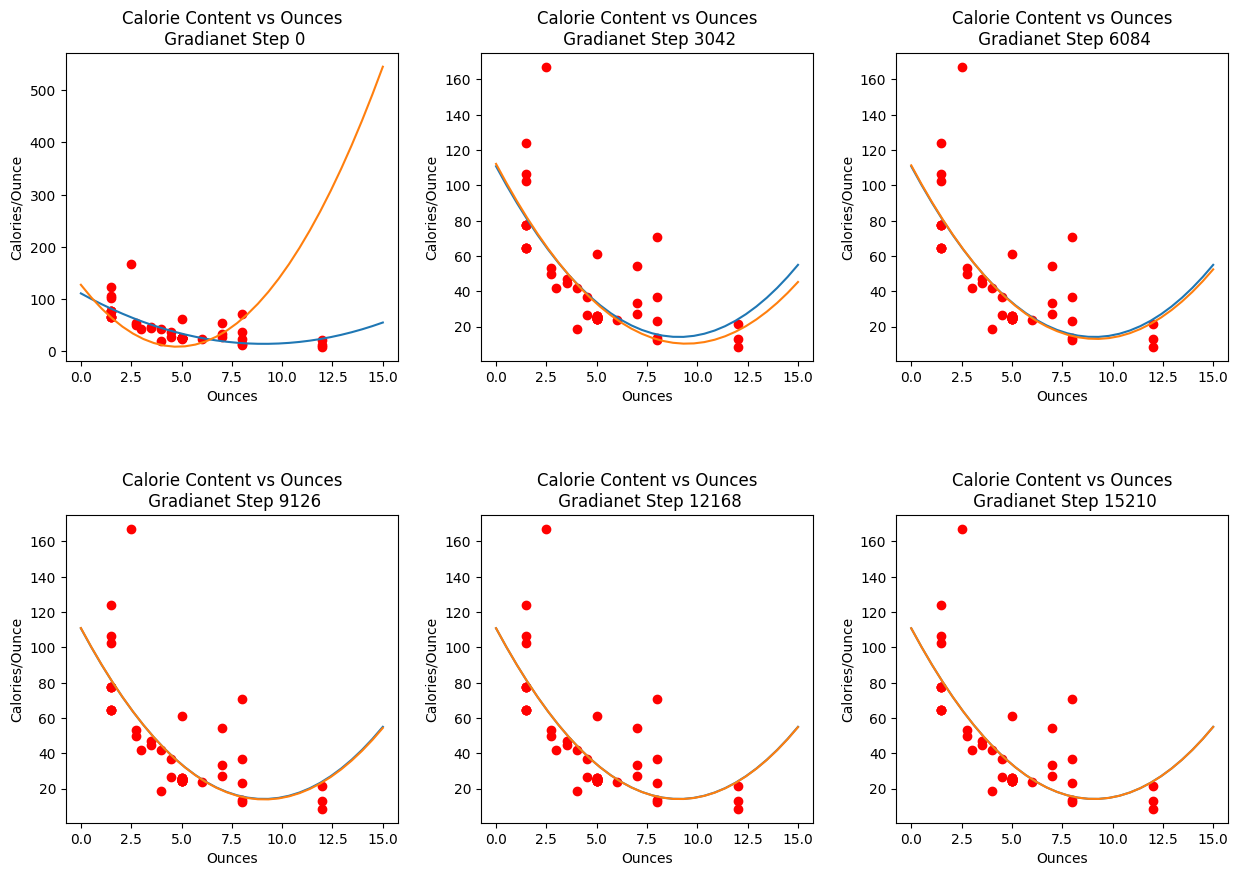

In [48]:
x=np.linspace(0,15,30)
n = 0
step = (len(a)-1)//6


fig3,ax3 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig3.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax3[row,col].plot(oz,cal_per_ounce,"ro");
        ax3[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax3[row,col].set_xlabel('Ounces');
        ax3[row,col].set_ylabel('Calories/Ounce');
        ax3[row,col].plot(x,arb_quad(x,qcoef[0],qcoef[1],qcoef[2]));
        ax3[row,col].plot(x,arb_quad(x,a[n],b[n],c[n]));
        n += step

In the graphs above we can see that after about 10,000 iterations we see little to no differennce between the values given by SciPy and those we found with gradient descent.

## Fitting an Exponential Function

$$f(x)=k+be^{ax}$$

In [49]:

# z0 = aX
# z1 = b*e^z0
# z2 = c+z1

# The cost function C
# C = mean of (z2-Y)^2
def C(x,y,a,b,c):
    # Predicted y values
    yp = arb_exp(x,a,b,c)
    # Error in the y values
    dy = yp-y
    return np.mean(dy**2)

# dC/dc = (dC/dz2)(dz2/dc) = (2(z2-Y))(1) 
def Cc(x,y,a,b,c):
    # Predicted y values
    yp = arb_exp(x,a,b,c)
    # Error in the y values
    dy = yp-y
    return np.mean(2*dy*(1))

# dC/db = (dC/dz2)(dz2/db) = (dC/dz2)(dz2/dz1)(dz1/db) = (2(z2-Y))(1)(e^z0) 
def Cb(x,y,a,b,c):
    # Predicted y values
    yp = arb_exp(x,a,b,c)
    # Error in the y values
    dy = yp-y
    z0 = a*x
    return np.mean(2*dy*(1)*(np.exp(z0)))

# dC/da = (dC/dz2)(dz2/da) = (dC/dz2)(dz2/dz1)(dz1/da) = (dC/dz2)(dz2/dz1)(dz1/dz0)(dz0/da) = (2(z2-Y))(1)(z1)(x) 
def Ca(x,y,a,b,c):
    # Predicted y values
    yp = arb_exp(x,a,b,c)
    # Error in the y values
    dy = yp-y
    z0 = a*x
    z1 = b*np.exp(z0)
    return np.mean(2*dy*(1)*(z1)*(x))


In [50]:
temp_c = np.min(Y)-1
temp_a = np.log((Y[-1]-temp_c)/(Y[0]-temp_c))/(X[-1]-X[0])
temp_b = (Y[0]-temp_c)/np.exp(temp_a*X[0])

ecoef,ecovar = curve_fit(arb_exp, X, Y,[temp_a,temp_b,temp_c])

c = [temp_c]
a = [temp_a]
b = [temp_b]

dt = 10**(-4)

for i in range(400000):
# Calculate the change
    da_temp = dt*Ca(X,Y,a[-1],b[-1],c[-1])
    db_temp = dt*Cb(X,Y,a[-1],b[-1],c[-1])
    dc_temp = dt*Cc(X,Y,a[-1],b[-1],c[-1])
# Calculate the new parameters
    temp_a = a[-1]-da_temp
    temp_b = b[-1]-db_temp
    temp_c = c[-1]-dc_temp
# Check for improvement
    current_C = C(X,Y,a[-1],b[-1],c[-1])
    next_C = C(X,Y,temp_a,temp_b,temp_c)
    if next_C < current_C:
        a.append(temp_a)
        b.append(temp_b)
        c.append(temp_c)
        dt = dt*1.01
    else:
        dt = dt*0.9
print(len(a),"\t:",a[-1],b[-1],c[-1])
print(ecoef)

365489 	: -0.43294857160494704 125.17623992802605 18.299108367481324
[ -0.47347768 134.00023209  19.42020155]


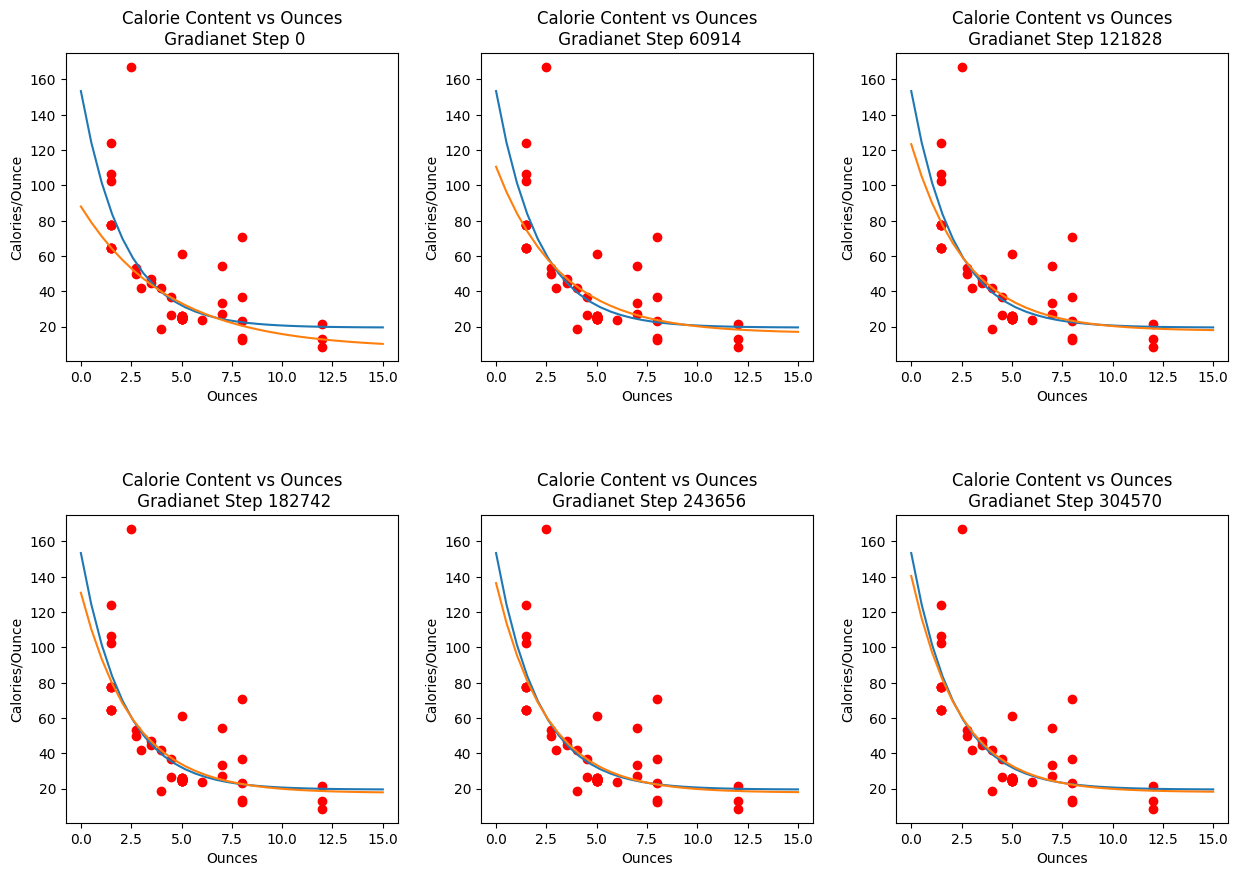

In [51]:
x=np.linspace(0,15,30)
n = 0
step = (len(a))//6

fig4,ax4 = plt.subplots(ncols=3,nrows=2,figsize=(15,10));
fig4.subplots_adjust(hspace=0.5,wspace=0.25)
for row in range(2):
    for col in range(3):
        ax4[row,col].plot(oz,cal_per_ounce,"ro");
        ax4[row,col].set_title("Calorie Content vs Ounces\n Gradianet Step %s"%n);
        ax4[row,col].set_xlabel('Ounces');
        ax4[row,col].set_ylabel('Calories/Ounce');
        ax4[row,col].plot(x,arb_exp(x,ecoef[0],ecoef[1],ecoef[2]));
        ax4[row,col].plot(x,arb_exp(x,a[n],b[n],c[n]));
        n += step

In [52]:
from numpy import log

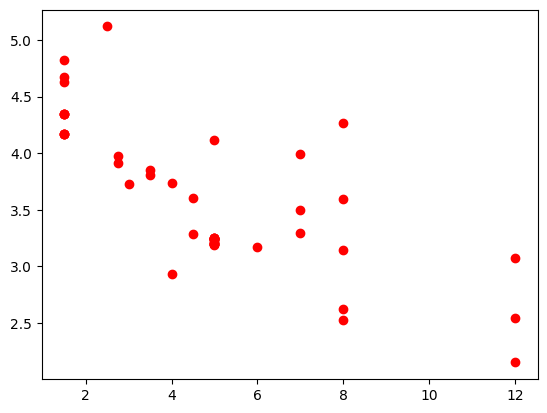

In [53]:
plt.plot(X,log(Y),"ro")

In [54]:
# Set reasonable starting values
a = [(log(Y[0])-log(Y[-1]))/(X[0]-X[-1])]
b = [log(Y[0])]

# Set initial learning rate
dt = 0.01
for i in range(300):
    new_a = a[-1]-dt*Ca(X,log(Y),a[-1],b[-1])
    new_b = b[-1]-dt*Cb(X,log(Y),a[-1],b[-1])
    current_C = C(X,log(Y),a[-1],b[-1])
    updated_C = C(X,log(Y),new_a,new_b)
    if updated_C < current_C:
        a.append(new_a)
        b.append(new_b)
        dt = 1.01*dt
    else:
        dt = 0.9*dt

TypeError: Ca() missing 1 required positional argument: 'c'

In [ ]:
a[-1]

In [ ]:
b[-1]

In [ ]:
np.exp(b[-1])

In [ ]:
ecoef